# Navigation

---

This notebook, uses Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
import os
current_path = os.getcwd()
#UnityEnvName = 'Banana_Linux/Banana.x86_64'
env = UnityEnvironment(file_name=os.path.join(current_path,"Banana_Linux", "Banana.x86_64"))

#env = UnityEnvironment(file_name="/home/aniketmansi/Desktop/RLStudy/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [5]:
# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [6]:
from dqn_agent import DQNAgent

### 3. DQN Agent 

In [7]:
dqn_agent = DQNAgent(state_size=37, action_size=4, seed=0)

In [8]:
from collections import deque
import torch
def dqn(n_episodes=2000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    score_episode = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start   
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = dqn_agent.act(state, eps)        # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished

            dqn_agent.step(state, action, reward, next_state, done)

            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step

            if done:                                       # exit loop if episode finished
                break
                        
        scores_window.append(score)       # save most recent score
        score_episode.append(score)
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        #print('\rEpisode {}\tScore: {:.2f}\tTime Step: {:.2f}'.format(i_episode, score, float(t), end=""))
        print('\rEpisode {}\tAverage Score: {:.2f}\tTime Step: {:.2f}'.format(i_episode, np.mean(scores_window), t), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(dqn_agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break 
    return score_episode


n_episodes=2000
eps_start=1.0 
eps_end=0.01
eps_decay=0.995
max_t=2000
scores = dqn(n_episodes,max_t,eps_start,eps_end, eps_decay)


Episode 100	Average Score: 0.32	Time Step: 299.00
Episode 200	Average Score: 1.24	Time Step: 299.00
Episode 300	Average Score: 1.87	Time Step: 299.00
Episode 400	Average Score: 4.90	Time Step: 299.00
Episode 500	Average Score: 6.38	Time Step: 299.00
Episode 600	Average Score: 10.19	Time Step: 299.00
Episode 700	Average Score: 11.50	Time Step: 299.00
Episode 799	Average Score: 13.04	Time Step: 299.00
Environment solved in 699 episodes!	Average Score: 13.04


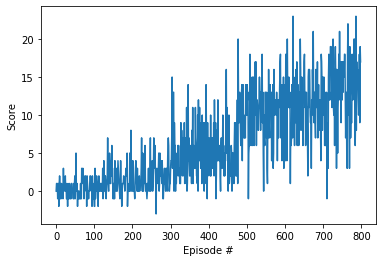

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the scoresdqn_agent
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('banana_scores.png')
plt.show()



When finished, you can close the environment.

In [ ]:
env.close()